In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Akkju\AppData\Local\Temp\ipykernel_13164\804188518.py:5: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')


In [2]:
def clean_list(skills_list):
    if pd.notna(skills_list):
        return ast.literal_eval(skills_list)

df['job_skills'] = df['job_skills'].apply(clean_list)

In [3]:
import seaborn as sns

In [5]:
df_DA_US = df[(df['job_country']=='United States')& (df['job_title_short']=='Data Analyst')]

In [6]:
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

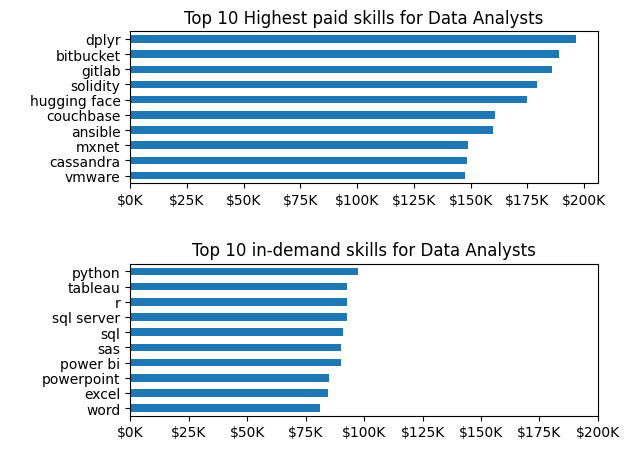

In [38]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_grouped = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_top_pay = df_DA_grouped.sort_values(by='median',ascending=False).head(10)

df_top_skills = df_DA_grouped.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False).head(10)

fig, ax = plt.subplots(2,1)

df_top_pay.plot(kind='barh',y='median', ax = ax[0],legend=False)
ax[0].set_title('Top 10 Highest paid skills for Data Analysts')
ax[0].invert_yaxis()
ax[0].set_xlabel(' ')
ax[0].set_ylabel(' ')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, i: f'${int(x/1000)}K'))

df_top_skills.plot(kind='barh',y='median', ax=ax[1],legend=False)
ax[1].set_title('Top 10 in-demand skills for Data Analysts')
ax[1].invert_yaxis()
ax[1].set_xlabel(' ')
ax[1].set_ylabel(' ')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, i: f'${int(x/1000)}K'))

plt.xlim(0, 200000)
fig.tight_layout()

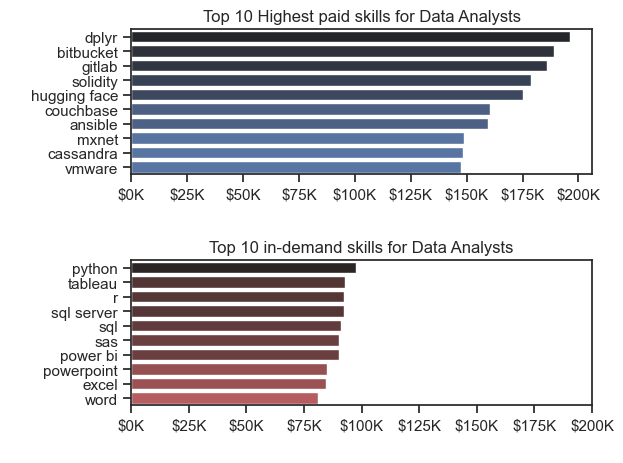

In [60]:
#These bar charts are from previous lesson

df_DA_US = df_DA_US.explode('job_skills')
df_DA_grouped = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_top_pay = df_DA_grouped.sort_values(by='median',ascending=False).head(10)
df_top_skills = df_DA_grouped.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False).head(10)

#plotting
sns.set_theme(style='ticks')

fig, ax = plt.subplots(2,1)
sns.barplot(data=df_top_pay, x='median',y=df_top_pay.index,ax= ax[0], hue='median', palette='dark:b_r')
#df_top_pay.plot(kind='barh',y='median', ax = ax[0],legend=False)
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest paid skills for Data Analysts')
ax[0].set_xlabel(' ')
ax[0].set_ylabel(' ')
#ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, i: f'${int(x/1000)}K'))

sns.barplot(data=df_top_skills,x='median',y=df_top_skills.index,ax=ax[1],hue ='median',palette='dark:r_r')
#df_top_skills.plot(kind='barh',y='median', ax=ax[1],legend=False)
ax[1].legend().remove()
ax[1].set_title('Top 10 in-demand skills for Data Analysts')
#ax[1].invert_yaxis()
ax[1].set_xlabel(' ')
ax[1].set_ylabel(' ')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, i: f'${int(x/1000)}K'))

plt.xlim(0, 200000)
fig.tight_layout()

Text(12.444444444444445, 0.5, 'Jobs Count')

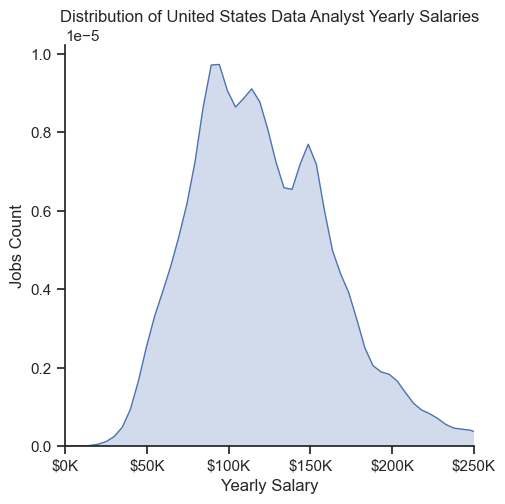

In [61]:
sns.displot(data = df['salary_year_avg'], kind = 'kde',fill=True) #Histogram from previous lesson
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, i: f'${int(x/1000)}K'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Jobs Count')

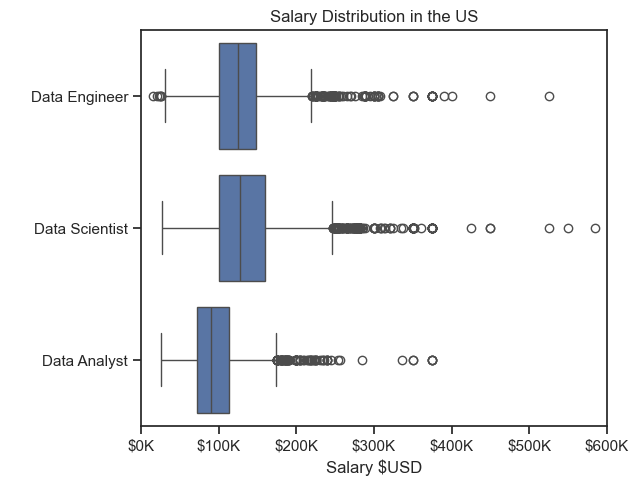

In [81]:
df_US = df[(df['job_country']=='United States')& (df['job_title_short']=='Data Analyst')| (df['job_title_short']=='Data Scientist')| (df['job_title_short']=='Data Engineer')]

#Boxplot from previous lesson
sns.boxplot(data=df_US, x='salary_year_avg',y='job_title_short')

plt.ylabel(' ')
plt.tight_layout()
plt.title('Salary Distribution in the US')
plt.xlabel('Salary $USD')
ax = plt.gca()
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.xlim(0, 600000)
plt.show()